# Sample Size - How much data is enough for your experiment?

<div class="alert alert-block alert-danger">
<b>Alert:</b> If you're running this on <b>Google Colab</b>, then uncomment and run the next two cells.
</div>

In [1]:
# !git clone https://github.com/Mark-Kramer/METER-Units.git

In [2]:
# import sys
# sys.path.insert(0,'/content/METER-Units')

## 0 - Setup & Introduction

In [3]:
# Load modules
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import statsmodels.api as sm
# Load custom functions
from sample_size_functions import *

<div class="alert alert-block alert-info">

*Introduction*:

- Imagine we are studying a potential new *genetic biomarker for longevity*, substance $x$. 
- Our goal is to design and perform an experiment to test the predictive power of this novel biomarker. To do so, we need to compute the **sample size** for our experiment, the number of subjects from whom to collect data, to determine whether the biomarker is useful.
- That's the goal of this unit: perform a sample size calculation.
- To start, we'll provide limited information about substance $x$ and longevity, and ask you to determine the sample size.
- **No idea how to start a sample size calculation?** Don't worry! The goal of this unit is to teach you a general approach.
- By the end of this unit, you'll have a deeper understanding of what sample size means, and a general, practical approach to compute it.
</div>

## 1 - Just Google it?

- Imagine that we have a scientific hypothesis based on previous work that suggests that substance $x$ is a genetic biomarker for longevity (i.e., age at death). 
- Before conducting an experiment to test the predictive power of this novel biomarker, we need to compute the **sample size** for our experiment.
- So, let's do it.
- We will see that the sample size required to generate data that can support a scientific hypothesis depends directly on the prior beliefs and knowledge about that hypothesis. Imagine that we have the following limited information about substance $x$ and longevity:
    - *People have a normal distribution of expression of substance $x$.*
    - *Individuals at the high end of expression levels tend to live about 5 years longer than people at the low end.*

<div class="alert alert-block alert-success">

**Q:** Given this information, from how many individuals do we need to collect data to have a reasonable chance of demonstrating this hypothesis is correct? (I.e., What is the **sample size**?)

**A:**

</div>

<div class="alert alert-block alert-danger">
<b>Alert: Wait, I have no idea how to answer this?</b>

</p>

- Don't worry!
- The goal of this unit is to teach you to tackle this problem.
- Let’s first come up with any approach to compute a sample size, even if we’re not confident in the results.

A few possible places to start:

- Take an educated guess: Perhaps you have taken part in or read about similar research before. What order of magnitude seems right for this sort of experiment?
- Find a source: Sample size estimation is a common topic in introductory statistics textbooks. These often include formulas that students can use to compute sample size for specific categories of questions.
- 
“Google it”: There are many web-based resources (including online calculators) that are designed to enable sample size calculations. Search engines provide a starting point for finding such resource Doing so, you might end up at a website [like this](https://researchmethodsresources.nih.gov/grt-calculator) or [like this](https://www.abs.gov.au/websitedbs/d3310114.nsf/home/sample+size+calculator).

Can you estimate the sample size using any of these approaches? What obstacles did you encounter along the way. (NOTE: This isn’t always easy or obvious, even for veteran researchers!! 


</div>

<div class="alert alert-block alert-success">

**Q:** Given the description of the scientific hypothesis and experiment, think about what data you would collect and what analyses you would perform to test the hypothesis.

- What types of values do you expect for each variable? What are their distributions, do you think?- How do you expect the variables to be related?- Try drawing a sketch of what you imagine a successful result might look like?

**A:**

</div>

<div class="alert alert-block alert-success">

**Q:** We provided very little information and asked you to compute the sample size. What other information do you think would be helpful to estimate the sample size?

**A:**

</div>

## 2- Underpowered experiments are doomed to failure.

Now that you've determined (or guessed) the sample size `N` for your experiment, let's perform the experiment.

You collect `N` samples of data, so that you receive from each individual:

* `x` - a measure of the proposed biomarker for longevity,

* `lifespan` - the individual's age at death.


In [4]:
N = 100                               # Here, learner will input N they found in Mini 1.
x,lifespan = load_data(N)             # Use this by default.
# x,lifespan = load_data_Colab(N)     # Use this if on !!GOOGLE COLAB!!

Let's start by plotting the data.

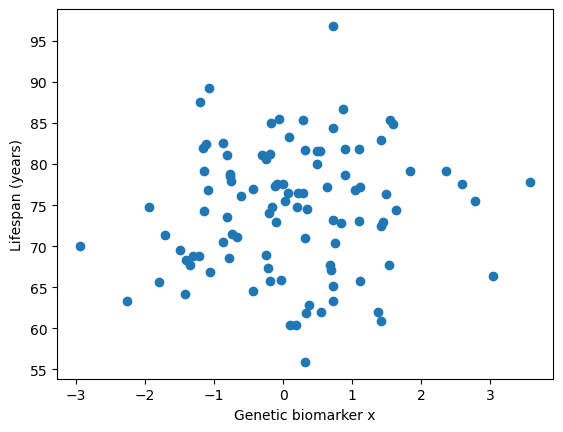

In [5]:
plt.scatter(x,lifespan)
plt.xlabel('Genetic biomarker x')
plt.ylabel('Lifespan (years)');

<div class="alert alert-block alert-success">

**Q:** What do you observe? Does the hypothesized relationship between the biomarker $x$ and lifespan appear present in the data?

**A:**

</div>

Let's assess the relationship between the biomarker `x` and `lifespan` beyond visual inspection.

There are many ways to do so.

Here, we'll fit a line to the data and compute the slope.

In [6]:
# Estimate a line from the data.

from statsmodels.formula.api import ols

dat                = {"x": x, "lifespan": lifespan}
regression_results = ols("lifespan ~ 1 + x", data=dat).fit()

<div class="alert alert-block alert-success">

**Q:** If this code is new to you, don't worry. Can you see the equation for the line in the code above?

**A:**
    
</div>

Now, with the line estimated, we can print the estimated slope and its p-value.

In [7]:
print('Slope estimate =',regression_results.params[1])
print('p-value        =',regression_results.pvalues[1])

Slope estimate = 0.6044566618478564
p-value        = 0.3626426888619829


Let's also **visualize** the estimated line by plotting it with the data.

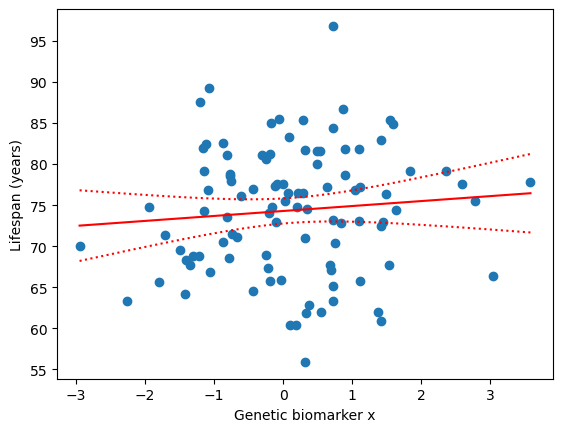

In [8]:
pred   = regression_results.get_prediction().summary_frame()
mn     = pred['mean']
ci_low = pred['mean_ci_lower'] 
ci_upp = pred['mean_ci_upper']

# And plot it.
indices_sorted = np.argsort(x,0)
plt.scatter(x,lifespan)
plt.plot(x[indices_sorted[:,0]],mn[indices_sorted[:,0]], 'r')
plt.plot(x[indices_sorted[:,0]],ci_low[indices_sorted[:,0]], ':r')
plt.plot(x[indices_sorted[:,0]],ci_upp[indices_sorted[:,0]], ':r')
plt.xlabel('Genetic biomarker x')
plt.ylabel('Lifespan (years)');

<div class="alert alert-block alert-success">

**Q:** Do you find a significant relationship between the genetic biomarker `x` and `lifespan`?

**A:**

</div>

<div class="alert alert-block alert-danger">
<b>Alert: Wait, this doesn't make sense!</b>

</p>

- We've applied a standard approach to compute sample size `N` and performed the experiment using this sample size.

- We see a trend supporting the hypothesized relationship, but it's not significant.

- Has the experiment failed?

What's going on?
</div>

<div class="alert alert-block alert-info">

*Moment of tension*:

- Hook the learner - "something isn't right and I want to know why."

</div>

## 3- What is the effect size?

In Minis 1 & 2, we determined a sample size `N`, collected data with that sample size, and tested for a relationship between longevity and biomarker $x$.

Our results failed to support the hypothesis with sufficient statistical significance!

Despite this failure, these data can still be useful.

In this Mini, we'll see how to use these data to estimate the **effect size**.

<div class="alert alert-block alert-success">

**Q:** What is the effect size for the data you analyzed in Mini 2?
- Come up with a numerical measure that describes how meaningful the relationship between substance $x$ and lifespan is. What is the value of this measure for the data you obtained in Unit 2?
- What does this effect size mean in words?- Is it consistent with your hypothesis?- If this effect size were correct, would it be scientifically meaningful? If so, why is the effect not statistically significant?

**A:**

</div>

<div class="alert alert-block alert-success">

**Q:** Imagine you repeated the experiment. Would you expect to see the same effect size?

**A:**

</div>

## 4- With resampling you can repeat any experiment.


- The data provided in Mini 2 represent one instantiation of the experiment.
- Maybe we were unlucky and repeating the experiment with sample size `N` would produce significant results.
- But, repeating the experiment is expensive.
- An alternative is to resample your data in hand.

In this Mini, we'll implement a resampling procedure (with fixed sample size `N`) and examine variability in the effect size. 

Our resampling procedure consists of 3 steps:

1) Draw a new (random) set of labels we can use to index our data (biomarker $x$ and lifespan).
2) Use these indices to create a resampled data set.
3) Compute the relationship (and its statistical significance) in our resampled data (i.e., between the biomarker $x$ and lifespan).

We'll now describe each step. For a related example, [see this video](https://youtu.be/mqDEJyW_z4c?si=heigY8z5PqAjnwKZ).

**First**, we need to draw a set of labels we can use to index our data.

To do so, we'll create a random list of indices, of size equal to the length of our data.

We'll do so *with replacement*, so that the same index may be listed once, twice, or more, or not at all.

In [9]:
ind = np.random.choice(np.size(x), np.size(x))
print(ind)

[94 54 76 58 61 53 48 79 10 18 64  6 43  0 53 26 87 88 26 83 83 61 74  1
 24 80 61 29 28  1 97 57 55 78 89 17 44 96  8 98 61 97 51 36 98 25 86 90
 34 44 26 12  2 78 54 98 52 26 92 79 86 41 27  9 42 31 81 44 63 58 56 27
 92 67 53 12 87 51 77 65 85 10  5 71 34 72 15 36 50  3 55 50 25 11 76 24
 84 77 63 19]


<div class="alert alert-block alert-success">

**Q:** Look at the values in `ind`. What do they mean?

**A:**

</div>

<div class="alert alert-block alert-success">

**Q:** Run the code to generate `ind` again. What do you find? (I.e., is it the same or different than the first time?)

**A:**

</div>

**Second**, we'll used these indices to generate the resampled data

In [10]:
x_resampled = x[ind]
lifespan_resampled = lifespan[ind]

<div class="alert alert-block alert-success">

**Q:** Look at the values in `x_resampled` and `lifespan_resampled`. Do they make sense?

**A:**

</div>

**Third**, we determine the relationship between the resampled biomarker $x$ and the resampled lifespan.

To do so, we'll fit the same linear model to our new resampled data, and again compute the slope and significance.

In [11]:
dat                = {"x": x_resampled, "lifespan": lifespan_resampled}
regression_results = ols("lifespan ~ 1 + x", data=dat).fit()

print('Slope estimate =',regression_results.params[1])
print('p-value        =',regression_results.pvalues[1])

Slope estimate = 1.0435805840945411
p-value        = 0.1256651671438042


<div class="alert alert-block alert-success">

**Q:** Repeat these steps to generate results from multiple "experiments". Do you ever find a significant result? How often do the p-values you find reach your desired level of statistical significance?

**A:**

</div>

<div class="alert alert-block alert-info">

*Conclusion*:

- Using the sample size `N` and resampling the data we get qualitatively similar - but quantitatively different - results.
- The effect size (i.e., slope) is consistently positive across resamples. That's consistent with our hypothesis.
- But, we do not (or very infrequently) find a significant relationship between lifespan and $x$.
- The significance (p-value) changes for each resample. 

</div>

## 5- You have the power!  

Resampling provides a direct, computational approach to compute the **power**.

<div class="alert alert-block alert-danger">
Define power.
    
- It's a mysterious parameter in the online calculator.
- What does Power = 0.8 mean?
- What does alpha = 0.05 mean?
</div>

The procedure to compute the power using resampling is simple. Here are the steps in general:

1. Resample the data.
2. Compute the significance of the proposed effect.
3. Repeat 1-2 many times.

The power is the number of times we detect a significant effect, divided by the total number of repetitions.

Let's apply this procedure to our data and effect of interest:

In [12]:
number_of_repetitions = 1000
p_value = np.zeros(number_of_repetitions)
for k in np.arange(number_of_repetitions):
    ind = np.random.choice(np.size(x), np.size(x))
    x_resampled = x[ind]
    lifespan_resampled = lifespan[ind]
    dat                = {"x": x_resampled, "lifespan": lifespan_resampled}
    regression_results = ols("lifespan ~ 1 + x", data=dat).fit()
    p_value[k] = regression_results.pvalues[1]

<div class="alert alert-block alert-success">

**Q:** Does the code above make sense? Can you see the data resampled, and the estimated model?

**A:**

</div>

Now, compute the power.

In [13]:
Power = np.sum(p_value < 0.05)/number_of_repetitions
print(Power)

0.124


<div class="alert alert-block alert-success">

**Q:** What value do you find for `Power`?

- Interpert this value.
- Do you have enough data to detect the effect?

**A:**

</div>

## 5* (Optional Extension)- You have the power!

In this optional Mini, we consider an **alternative strategy to compute the power**.

Instead of resampling the data, we **fit a model to the data**, then use that model to generate new data samples.


---
Let's begin by fitting a model to the data.

We'll use a simple model: a line.

We've already fit this model to estimate the effect size and its significance.

We'll now fit the model, save the model parameters, then use this model to generate new data samples.

Let's begin by fitting the model to our data.

In [14]:
# Fit the model (a line) to the data.

from statsmodels.formula.api import ols
dat   = {"x": x, "lifespan": lifespan}
model = ols("lifespan ~ 1 + x", data=dat).fit()

The model estimates two parameters: the `slope` and `intercept`.

Let's get those two parameters:

In [15]:
intercept = model.params[0]
slope     = model.params[1]
print('Intercept estimate = ',intercept)
print('Slope estimate     = ',slope)

Intercept estimate =  74.28918031356176
Slope estimate     =  0.6044566618478564


We'll need one more estimate from the model fit: the dispersion.


The **dispersion parameter** describes the amount of uncertainty in our ability to predinct each data point. In this case, it is the residual standard deviation of the lifespan after we have tried to predict it using the expression level of substance $x$.

In [16]:
dispersion = np.sqrt(model.scale)
print('Dispersion parameter = ',dispersion)

Dispersion parameter =  7.643693808411916


<div class="alert alert-block alert-danger">
[Add some text interpreting these three estimated values…]
</div>

With the 3 estimated parameters, we can now simulate realizations of the model. 

To do so, we'll evaluate this model:

`lifespan_modeled = intercept + slope * x + np.random.normal(loc=0.0, scale=dispersion, size=N)`

<div class="alert alert-block alert-success">

**Q:** Describe - in words - each term in the equation.
- What variables do you recognize?
- What variables are now?
- What is the equation doing???

**A:**

</div>

Now, let's see what the model does.

To do so, we'll evaluate the model, and compare the `lifespan_modeled` to the original `lifespan`.

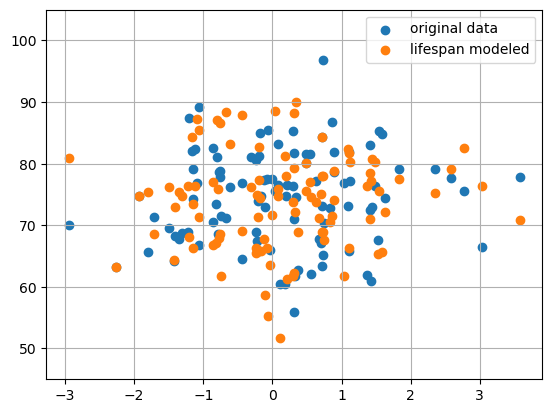

In [17]:
lifespan_modeled = intercept + slope * x + np.random.normal(loc=0.0, scale=dispersion, size=[N,1])
plt.scatter(x,lifespan, label='original data')
plt.scatter(x,lifespan_modeled, label='lifespan modeled')
plt.legend()
plt.grid()
plt.ylim([45, 105]);

<div class="alert alert-block alert-success">

**Q:** Compare the original `lifespan` data and the `lifespan_modeled` data.
- How do they look similar?
- How do they look different?
- Do the modeled data provide a "good" representation of the original data?

**A:**

</div>

With the model estimated, we can use it to compute the power. Here are the steps in general:

1. Use the model to generate `lifespan_modeled` data.
2. Compute the significance of the proposed effect.
3. Repeat 1-2 many times.

The power is the number of times we detect a significant effect, divided by the total number of repetitions.

Let's apply this procedure to our data and effect of interest:

In [18]:
number_of_repetitions = 1000
p_value = np.zeros(number_of_repetitions)
for k in np.arange(number_of_repetitions):
    lifespan_modeled = intercept + slope * x + np.random.normal(loc=0.0, scale=dispersion, size=[N,1])
    dat                = {"x": x, "lifespan": lifespan_modeled}
    regression_results = ols("lifespan ~ 1 + x", data=dat).fit()
    p_value[k] = regression_results.pvalues[1]
Power = np.sum(p_value < 0.05)/number_of_repetitions
print('Power = ',Power)

Power =  0.153


<div class="alert alert-block alert-success">

**Q:** Does the code above make sense? Can you see the modeled lifespan data, and the estimated model?

**A:**

</div>

<div class="alert alert-block alert-success">

**Q:** What value do you find for `Power`?

- Interpert this value.
- Do you have enough data to detect the effect?
- How do these results compare to the resampling approached described in Mini 5?

**A:**

</div>

## 6- You have the sample size!

- In Mini 5, we used resampling with a fixed sample size to compute the power.
- We can use the same resampling approach to compute the **sample size** for a fixed power.

<div class="alert alert-block alert-danger">
Provide some intuition for this calculation.
</div>

Let's do it!

In [19]:
N_resampled = 1000;
number_of_repetitions = 1000
p_value = np.zeros(number_of_repetitions)
for k in np.arange(number_of_repetitions):
    ind = np.random.choice(np.size(x), N_resampled)
    x_resampled = x[ind]
    lifespan_resampled = lifespan[ind]
    dat                = {"x": x_resampled, "lifespan": lifespan_resampled}
    regression_results = ols("lifespan ~ 1 + x", data=dat).fit()
    p_value[k] = regression_results.pvalues[1]
Power = np.sum(p_value < 0.05)/number_of_repetitions
print('N=',N_resampled,'Power=',Power)

N= 1000 Power= 0.86


<div class="alert alert-block alert-success">

**Q:** Compare this code to the code in Mini 5. What has changed?

**A:** ... we include `N_resampled` as a new variable, and use it in the code.

</div>

<div class="alert alert-block alert-success">

**Q:** How does increasing the sample size `N_resampled` impact the power?

**A:**

</div>

<div class="alert alert-block alert-success">

**Q:** At what value of `N_resampled` is the power just above 0.8?

- How does this compare to the results from your online calculator?

**A:**

</div>

## 6* (Optional Extension) - You have the sample size!

In this optional Mini, we consider an **alternative strategy to compute the sample size**.

Instead of resampling the data, we **fit a model to the data**, then use that model to generate new data samples.

---
If you haven't done so, please first complete *Mini 5\* (Extensions)*.

In that optional Mini, we introduce the modeling approach, and apply it to compute the power.

---
Let's now use this same strategy to compute the sample size.

The first step is to estimate the model. We use the same code as in *Mini 5\* (Extensions)*.

In [20]:
# Fit the model (a line) to the data.
from statsmodels.formula.api import ols
dat   = {"x": x, "lifespan": lifespan}
model = ols("lifespan ~ 1 + x", data=dat).fit()

intercept  = model.params[0]
slope      = model.params[1]
dispersion = np.sqrt(model.scale)

We'll now use the model to generate new samples of data, given a sample size `N_modeled`.

To do so, we'll re-use the code from Mini 6, with some small changes.

In [21]:
N_modeled = 800;                                  # This is the a part!
number_of_repetitions = 1000
p_value = np.zeros(number_of_repetitions)
for k in np.arange(number_of_repetitions):
    ind = np.random.choice(np.size(x), N_modeled)  # There's something new here, and in the next line.
    lifespan_modeled = intercept + slope * x[ind] + np.random.normal(loc=0.0, scale=dispersion, size=[N_modeled,1])
    dat                = {"x": x[ind], "lifespan": lifespan_modeled}
    regression_results = ols("lifespan ~ 1 + x", data=dat).fit()
    p_value[k] = regression_results.pvalues[1]
Power = np.sum(p_value < 0.05)/number_of_repetitions
print('N=',N_modeled,'Power=',Power)

N= 800 Power= 0.727


<div class="alert alert-block alert-danger">
<b>Alert:</b>
</p>

- Notice the use of `ind` and `x[ind]` in the code. Why do we need this here?
</div>

<div class="alert alert-block alert-success">

**Q:** Compare this code to the code in Mini 6. What has changed?

**A:** ... we include `N_modeled` as a new variable.

</div>

<div class="alert alert-block alert-success">

**Q:** At what value of `N_modeled` is the power just above 0.8?

- How does this compare to the results from your online calculator?
- How does this result compare to your resampling approach in Mini 6?

**A:**

</div>

## 7- Well powered experiments can provide strong evidence

- We've now used (at least) two approaches to calculate the sample size
  1) online calculator
  2) resampling
- The result from the resampling analysis suggests a much larger sample size is required than the estimated sample size many researchers will obtain from naïve online searches.- Let’s now “collect new data” and see if we detect a significant effect.

Let's begin by collecting the new data, now using the sample size you found through resampling.

In [22]:
N = 1000                     #NOTE: Learner inputs sample size, based on results in previous Minis.
x,lifespan = load_data(N)             # Use this by default.
# x,lifespan = load_data_Colab(N)     # Use this if on !!GOOGLE COLAB!!

Let's plot it.

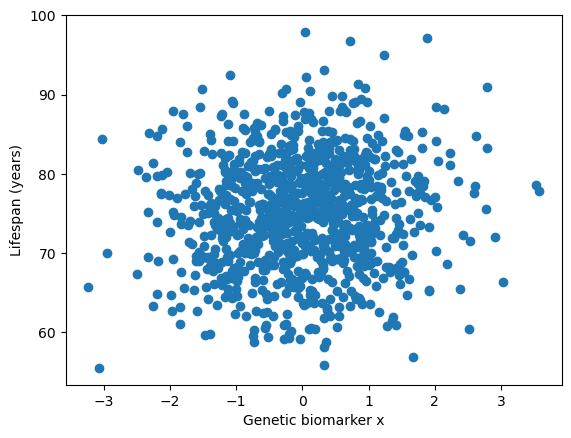

In [23]:
plt.scatter(x,lifespan)
plt.xlabel('Genetic biomarker x')
plt.ylabel('Lifespan (years)');

<div class="alert alert-block alert-success">

**Q:** Compare the plot of these new data (with `N=800`) to the plot of the original data. How are the plots similar or different?

- Do you see the same trend in both plots?

**A:**

</div>

Now, let's test our hypothesis in this new data set.

In [24]:
from statsmodels.formula.api import ols

dat                = {"x": x, "lifespan": lifespan}
regression_results = ols("lifespan ~ 1 + x", data=dat).fit()
print('Slope estimate =',regression_results.params[1])
print('p-value        =',regression_results.pvalues[1])

Slope estimate = 0.5601570179145712
p-value        = 0.011164950913058268


<div class="alert alert-block alert-success">

**Q:** What is the effect size and significance?

- How do these results compare to the original data set?

**A:**

</div>

Let's also **visualize** the estimated line by plotting it with the data.

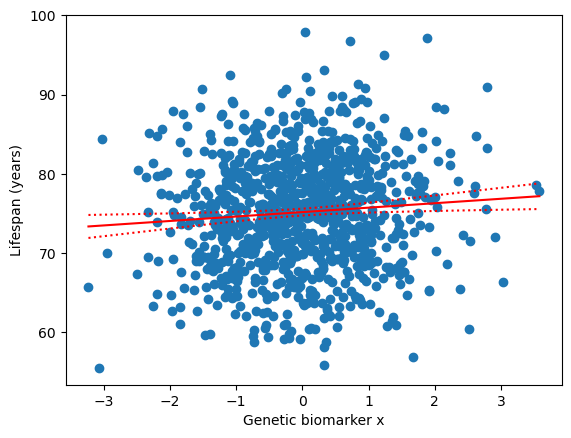

In [25]:
pred   = regression_results.get_prediction().summary_frame()
mn     = pred['mean']
ci_low = pred['mean_ci_lower'] 
ci_upp = pred['mean_ci_upper']

# And plot it.
indices_sorted = np.argsort(x,0)
plt.scatter(x,lifespan)
plt.plot(x[indices_sorted[:,0]],mn[indices_sorted[:,0]], 'r')
plt.plot(x[indices_sorted[:,0]],ci_low[indices_sorted[:,0]], ':r')
plt.plot(x[indices_sorted[:,0]],ci_upp[indices_sorted[:,0]], ':r')
plt.xlabel('Genetic biomarker x')
plt.ylabel('Lifespan (years)');

<div class="alert alert-block alert-success">

**Q:** How do these results compare to the original data set?

**A:**

</div>

<div class="alert alert-block alert-success">

**Q:** What do you conclude about the relationship between the genetic biomarker `x` and `lifespan`?

**A:**

</div>

<div class="alert alert-block alert-info">

*Conclusion*:

- The resampling procedure allowed us to compute a large enough sample size, so our experiment was sufficiently powered, and we detected a significant effect.


</div>

## 8- Summary

- Internet tools and statistics textbooks can provide useful formulas and calculators to estimate sample size, but uncertainty about which tools to use and how to provide correct prior knowledge about effect size can lead to underpowered experiments. In this example, many users will incorrectly arrive at a sample size of 10-100.- There are a number of reasons that researchers might arrive at the wrong answer in this example:
    - It’s very easy to underestimate variability in lifespan, which leads to an underestimate of sample size.    - Many textbooks and online calculators focus on predictors that can only take on a small number of values. Here, substance $x$ has a range of expression levels and many users will end up using the wrong tools.    - The prior knowledge about the effect of substance $x$ on lifespan was originally described in terms of the difference between individuals at the lowest vs. the highest expression levels. Most data points collected for the experiment will be somewhere between these expression levels.
 
- However, the actual required effect size is more like 500-1000    - This is due to the large variability in human lifespans compared to the relatively small effect size.- Although the effect size is meaningful scientifically, it is small compared to the measurement variability.

<div class="alert alert-block alert-danger">
<b>Warning:</b>
</p>
In this example, we were lucky that the initial draw of a small sample size produced the expected effect. An unlucky sample may have produced (by chance) an opposite effect. In that case, resampling will not produce meaningful power/sample size results. Preliminary data is often important for future experimental design, but it’s important to consider how variability in a small, preliminary dataset can influence power and sample size estimates.
</div>

<div class="alert alert-block alert-success">

**Q:** Consider a new preliminary data set (provided). Use these data to estimate the sample size required to achieve 80% power.

**A:**

</div>